# This notebook trains a logistic regression model from the 2014-2018 racing results to predict the top 10 in general classification at Tour de France

This is to test if the limited number of features we got are of any good.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [333]:
df_X = pd.read_csv('E:\cycling\cycling\data\X.csv',index_col='Rider',encoding='iso-8859-1')
df_y = pd.read_csv('E:\cycling\cycling\data\y.csv',index_col='Rider',encoding='iso-8859-1')

### Explore any clusters in the data

In [334]:
kMax = 10
cost=[]
for k in range(1,kMax+1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    cost.append(kmeans.inertia_)

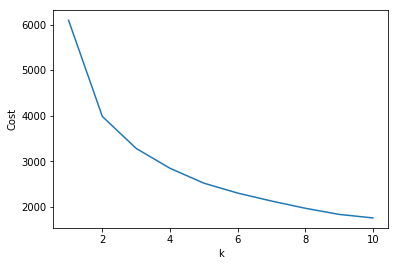

In [335]:
plt.plot(range(1, kMax+1),cost)
plt.xlabel('k')
plt.ylabel('Cost')
plt.show()

In [336]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# add clustering labels
df_cluster = df_X.copy()
df_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [337]:
df_cluster.groupby('Cluster Labels').count()

,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Cluster Labels,,,,,,,,,,,
0,152,152,152,152,152,152,152,152,152,152,152
1,78,78,78,78,78,78,78,78,78,78,78
2,221,221,221,221,221,221,221,221,221,221,221
3,24,24,24,24,24,24,24,24,24,24,24
4,33,33,33,33,33,33,33,33,33,33,33


In [338]:
df_cluster.loc[df_cluster['Cluster Labels'] == 0, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
PERAUD Jean-Christophe,0,72.0,586.0,2,5,13,640,44,0.0,0.0,0.0,5.0
FUGLSANG Jakob,0,47.0,753.0,0,1,7,390,41,0.0,0.0,1.0,70.0
GRIVKO Andriy,0,102.0,466.0,0,0,1,55,42,0.0,0.0,1.0,5.0
KANGERT Tanel,0,67.0,620.0,0,0,5,127,37,0.0,0.0,1.0,32.0
NIBALI Vincenzo,0,1.0,2793.0,1,2,8,464,38,0.0,0.0,4.0,105.0
WESTRA Lieuwe,0,95.0,497.0,2,3,3,145,45,1.0,2.0,2.0,80.0
BOOM Lars,0,49.0,744.0,0,1,4,68,23,0.0,0.0,1.0,3.0
VANMARCKE Sep,0,97.0,491.0,1,3,7,616,33,0.0,0.0,0.0,5.0
VAN AVERMAET Greg,0,15.0,1311.0,0,3,9,455,41,0.0,0.0,0.0,5.0


In [343]:
df_cluster.loc[df_cluster['Cluster Labels'] == 1, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
GASTAUER Ben,1,787.0,67.0,0,1,3,94,38,0.0,0.0,0.0,5.0
GRUZDEV Dmitriy,1,763.0,69.0,1,2,2,65,27,0.0,0.0,0.0,5.0
VANOTTI Alessandro,1,964.0,46.0,0,0,0,15,27,0.0,0.0,0.0,5.0
MARINO Jean-Marc,1,1134.0,33.0,0,0,1,29,37,0.0,0.0,0.0,5.0
SABATINI Fabio,1,598.0,98.0,0,0,2,10,27,0.0,0.0,0.0,5.0
BONNET William,1,925.0,50.0,0,0,0,37,34,0.0,0.0,0.0,0.0
PINEAU Cédric,1,662.0,86.0,0,1,1,72,45,0.0,0.0,0.0,5.0
KING Benjamin,1,1484.0,19.0,0,1,2,86,34,0.0,0.0,0.0,5.0
VANSUMMEREN Johan,1,711.0,79.0,0,0,1,32,29,0.0,0.0,0.0,5.0


In [342]:
df_cluster.loc[df_cluster['Cluster Labels'] == 2, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
CHEREL Mikael,2,317.0,195.0,0,0,5,151,47,0.0,0.0,0.0,18.0
KADRI Blel,2,431.0,140.0,0,0,0,5,22,0.0,0.0,0.0,5.0
MINARD Sébastien,2,495.0,121.0,0,0,1,121,41,0.0,0.0,0.0,5.0
RIBLON Christophe,2,96.0,491.0,0,0,0,44,28,0.0,0.0,0.0,0.0
IGLINSKIY Maxim,2,146.0,390.0,0,1,5,63,36,0.0,0.0,0.0,0.0
KRUIJSWIJK Steven,2,476.0,127.0,0,0,2,71,32,0.0,0.0,0.0,9.0
LEEZER Tom,2,272.0,232.0,0,0,1,30,28,0.0,0.0,0.0,5.0
TANKINK Bram,2,521.0,116.0,0,0,3,121,36,0.0,0.0,1.0,6.0
TEN DAM Laurens,2,170.0,358.0,0,0,1,135,36,0.0,0.0,0.0,48.0


In [341]:
df_cluster.loc[df_cluster['Cluster Labels'] == 3, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
SAGAN Peter,3,3.0,2673.0,7,18,30,990,50,1.0,3.0,6.0,114.0
DEMARE Arnaud,3,25.0,1056.0,9,14,24,961,51,0.0,0.0,1.0,1.0
KWIATKOWSKI Michal,3,30.0,995.0,8,18,23,1172,49,0.0,0.0,0.0,0.0
DEGENKOLB John,3,20.0,1166.0,5,18,22,1004,45,0.0,1.0,1.0,18.0
KRISTOFF Alexander,3,19.0,1192.0,9,11,23,996,55,0.0,0.0,2.0,20.0
CAVENDISH Mark,3,60.0,642.0,13,19,20,746,49,0.0,0.0,1.0,8.0
VALVERDE BELMONTE Alejandro,3,1.0,3152.0,7,17,23,1654,37,0.0,2.0,4.0,103.0
MATTHEWS Michael,3,35.0,980.0,5,10,14,699,43,1.0,1.0,1.0,45.0
DEGENKOLB John,3,6.0,1902.0,5,10,16,953,42,0.0,0.0,1.0,15.0


In [340]:
df_cluster.loc[df_cluster['Cluster Labels'] == 4, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
BARDET Romain,4,55.0,703.0,1,3,15,566,40,0.0,1.0,4.0,153.0
MOLLEMA Bauke,4,13.0,1357.0,1,6,15,630,37,0.0,3.0,5.0,220.0
MARTIN Tony,4,14.0,1320.0,7,9,15,798,55,2.0,2.0,4.0,316.0
DUMOULIN Tom,4,71.0,601.0,2,7,11,506,44,0.0,2.0,4.0,176.0
TROFIMOV Yury,4,264.0,240.0,1,2,6,280,38,1.0,2.0,2.0,107.0
BARDET Romain,4,25.0,1149.0,1,3,14,535,46,1.0,1.0,4.0,161.0
PINOT Thibaut,4,33.0,1023.0,2,5,17,772,47,1.0,2.0,5.0,254.0
YATES Simon,4,329.0,207.0,0,3,12,428,38,0.0,1.0,5.0,159.0
FROOME Chris,4,12.0,1437.0,6,9,14,674,33,3.0,4.0,6.0,368.0


In [344]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [345]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [346]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=315)

In [347]:
X_train = preprocessing.StandardScaler().fit(df_X_train).transform(df_X_train)
X_test = preprocessing.StandardScaler().fit(df_X_train).transform(df_X_test)
y_train = df_y_train.values
y_test = np.ravel(df_y_test.values)

### Logistic regression

In [348]:
clf_lr = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
pred_lr = clf_lr.predict(X_test)
cnf_matrix_lr = confusion_matrix(y_test, pred_lr, labels=[1,0])

Confusion matrix, without normalization
[[  5   4]
 [  4 155]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       159
          1       0.56      0.56      0.56         9

avg / total       0.95      0.95      0.95       168



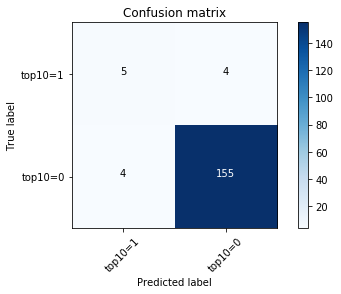

In [349]:
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['top10=1','top10=0'],normalize= False,  title='Confusion matrix')
print(classification_report(y_test,pred_lr))

In [353]:
df_pred_lr = df_X_test.copy()
df_pred_lr.insert(0,'predicted', pred_lr)
df_pred_lr['actual'] = df_y_test

In [354]:
df_pred_lr[(df_pred_lr['predicted']==1)|(df_pred_lr['actual']==1)]

,predicted,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,actual
Rider,,,,,,,,,,,,,
CONTADOR VELASCO Alberto,0,7.0,1698.0,0,10,19,881,43,0.0,0.0,3.0,62.0,1
YATES Simon,0,72.0,621.0,3,4,8,527,37,0.0,0.0,0.0,48.0,1
BARGUIL Warren,1,128.0,443.0,0,4,10,432,28,0.0,3.0,6.0,223.0,0
BARDET Romain,1,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0,1
PINOT Thibaut,1,33.0,1023.0,2,5,17,772,47,1.0,2.0,5.0,254.0,0
QUINTANA ROJAS Nairo Alexander,1,9.0,1560.0,1,7,14,606,31,1.0,2.0,4.0,209.0,1
ARU Fabio,1,50.0,777.0,1,3,12,461,26,0.0,0.0,4.0,135.0,1
BARGUIL Warren,0,76.0,613.0,0,0,4,245,35,0.0,0.0,0.0,6.0,1
MARTIN Daniel,1,30.0,993.0,1,9,20,959,36,0.0,2.0,3.0,193.0,1


### Neural network

In [355]:
from sklearn.neural_network import MLPClassifier

In [356]:
clf_nn = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10,4), random_state=1)
clf_nn.fit(X_train,y_train)
pred_nn = clf_nn.predict(X_test)
cnf_matrix_nn = confusion_matrix(y_test, pred_nn, labels=[1,0])

Confusion matrix, without normalization
[[  5   4]
 [  7 152]]
             precision    recall  f1-score   support

          0       0.97      0.96      0.97       159
          1       0.42      0.56      0.48         9

avg / total       0.94      0.93      0.94       168



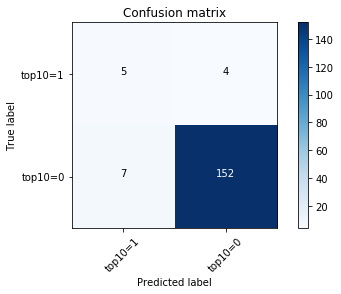

In [357]:
plt.figure()
plot_confusion_matrix(cnf_matrix_nn, classes=['top10=1','top10=0'],normalize= False,  title='Confusion matrix')
print(classification_report(y_test,pred_nn))

In [358]:
df_pred_nn = df_X_test.copy()
df_pred_nn.insert(0,'predicted', pred_nn)
df_pred_nn['actual'] = df_y_test
df_pred_nn[(df_pred_nn['predicted']==1)|(df_pred_nn['actual']==1)]

,predicted,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,actual
Rider,,,,,,,,,,,,,
NAESEN Oliver,1,37.0,1019.0,0,2,7,433,41,0.0,0.0,2.0,15.0,0
CONTADOR VELASCO Alberto,0,7.0,1698.0,0,10,19,881,43,0.0,0.0,3.0,62.0,1
RODRIGUEZ OLIVER Joaquim,1,24.0,1150.0,3,7,12,814,29,0.0,0.0,3.0,100.0,0
YATES Simon,0,72.0,621.0,3,4,8,527,37,0.0,0.0,0.0,48.0,1
BARGUIL Warren,1,128.0,443.0,0,4,10,432,28,0.0,3.0,6.0,223.0,0
BARDET Romain,1,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0,1
MOLLEMA Bauke,1,32.0,1129.0,1,3,12,477,41,0.0,0.0,1.0,59.0,0
PORTE Richie,1,10.0,1486.0,1,3,10,308,34,0.0,0.0,0.0,16.0,0
PINOT Thibaut,1,33.0,1023.0,2,5,17,772,47,1.0,2.0,5.0,254.0,0
